In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [35]:
image_size = 28
num_classes = 10
num_epochs = 20
batch_size = 64
learning_rate = 0.001
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                          train=False,
                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

indices = range(len(test_dataset))
indices_val = indices[:5000]
indices_test = indices[5000:]

sampler_val = torch.utils.data.sampler.SubsetRandomSampler(indices_val)
sampler_test = torch.utils.data.sampler.SubsetRandomSampler(indices_test)

validation_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                               batch_size=batch_size,
                                               shuffle=False,
                                               sampler=sampler_val)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         sampler=sampler_test)

In [3]:
# idx = 0
# muteimg = train_dataset[idx][0].numpy()
# plt.imshow(muteimg[0,...])
# print('标签是: ',train_dataset[idx][1])

3,7,7,3,9,2,3,9,

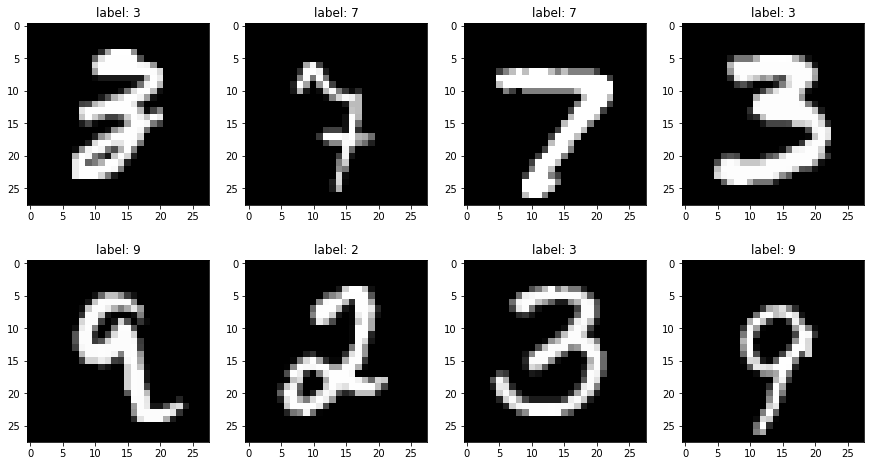

In [41]:
import random
random.seed(15558)
plt.figure(figsize=(15, 8))
for i in range(8):
    idx = random.randrange(len(train_dataset))
    plt.subplot(2, 4, i+1)
    muteimg = train_dataset[idx][0].numpy()
#     print('标签是:',train_dataset[idx][1])
    plt.title("label: {}".format(train_dataset[idx][1]))
    print('{},'.format(train_dataset[idx][1]), end='')
    plt.imshow(muteimg[0,...], cmap='gray')
plt.savefig('../../期末作业/figures/手写数字展示_黑白.png',dpi=900)

4,0,5,

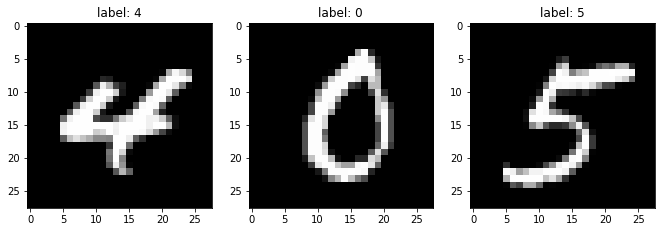

In [39]:
import random
random.seed(1588)
plt.figure(figsize=(11.25, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    idx = random.randrange(len(train_dataset))
    muteimg = train_dataset[idx][0].numpy()
    plt.title("label: {}".format(train_dataset[idx][1]))
    print('{},'.format(train_dataset[idx][1]), end='')
    plt.imshow(muteimg[0,...], cmap='gray')
    plt.savefig('../../期末作业/figures/标签.png',dpi=900)

In [38]:
# idx = 55
# muteimg = train_dataset[idx][0].numpy()
# plt.imshow(muteimg[0,...], cmap='gray')
# print('标签是: ',train_dataset[idx][1])
# plt.savefig('../../期末作业/figures/任务示意图.png',dpi=900)

In [6]:
depth = [4, 8]
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 4, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(depth[0], depth[1], 5, padding=2)
        
        self.fc1 = nn.Linear(image_size // 4 * image_size // 4 * depth[1], 512)
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(-1, image_size // 4 * image_size // 4 * depth[1])
        x = F.relu(self.fc1(x))
        
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        x = F.log_softmax(x, dim=1)
        return x
    
    def retrieve_features(self, x):
        feature_map1 = F.relu(self,conv1(x))
        x = self.pool(feature_map1)
        feature_map2 = F.relu(self.conv2(x))
        
        return (feature_map1, feature_map2)

In [7]:
net = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

record = []   # 记录准确率等数值
weights = []  # 每若干步就利率一次卷积核

for epoch in range(num_epochs):
    train_rights = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        net.train()
        
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = rightness(output, target)
        train_rights.append(right)
        
        if batch_idx % 100 == 0:
            net.eval()
            val_rights = []
            for (data, target) in validation_loader:
                data, target = Variable(data), Variable(target)
                output = nat(data)
                right = rightness(output, target)
                val_rights.append(right)
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            
            print('训练周期:{}[{}/{}({:.0f}%)]\t, Loss:{:.6f}\t, 训练正确率:{:.2f}%\t, 校验正确率:{:.2f}%'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.data[0],
            100. * train_r[0] / train_r[1],
            100. * val_r[0] / val_r[1]))
            
            record.append((100 -100. * train_r[0] / train_r[1], 100 -100. *val_r[0] / val_r[1]))
            
            weights.append([net.conv1.weight.data.clone(), net.conv1.bias.data.clone(),
                           net.conv2.weight.data.clone(), net.conv2.bias.data.clone()])

NameError: name 'rightness' is not defined

In [41]:
train_dataset[0][0][0][10]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0549, 0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])